# **<p style="  background: linear-gradient( to right, #f32170, #ff6b08,#cf23cf, #eedd44);-webkit-text-fill-color: transparent;-webkit-background-clip: text; text-align:center;  ">Airline Passenger Classification</p>**
The "Classification of Airline Passengers based on General Information and Feedback Provided" problem aims to develop a machine learning model that categorizes airline passengers into distinct groups or segments based on their demographic information, travel preferences, and feedback regarding their travel experiences. By analyzing a dataset containing passenger details, such as age, gender, travel frequency, destination choices, and feedback ratings, the objective is to create a classification model that helps airlines tailor their services, marketing strategies, and customer experiences to different passenger segments, ultimately enhancing customer satisfaction and optimizing airline operations.

In [39]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## *<span style="color:cyan">Dataset Loading and Cleaning</span>*

In [40]:
# Load the diabetes dataset
df_train = pd.read_csv("train.csv", index_col=0)
df_test = pd.read_csv("test.csv", index_col=0)
df_train.head()


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [41]:
# Cleaning the dataset
df_train = pd.get_dummies(df_train, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'])
df_test = pd.get_dummies(df_test, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'])

df_train = df_train.drop(columns=['id','Gender_Male','Customer Type_disloyal Customer','Type of Travel_Business travel','satisfaction_neutral or dissatisfied','Class_Eco Plus'])
df_test = df_test.drop(columns=['id','Gender_Male','Customer Type_disloyal Customer','Type of Travel_Business travel','satisfaction_neutral or dissatisfied','Class_Eco Plus'])

customer_type_mapping = {True: 1, False: 0}
df_train['Customer Type_Loyal Customer'] = df_train['Customer Type_Loyal Customer'].map(customer_type_mapping)
df_train['Gender_Female'] = df_train['Gender_Female'].map(customer_type_mapping)
df_train['satisfaction_satisfied'] = df_train['satisfaction_satisfied'].map(customer_type_mapping)
df_train['Type of Travel_Personal Travel'] = df_train['Type of Travel_Personal Travel'].map(customer_type_mapping)
df_train['Class_Business'] = df_train['Class_Business'].map(customer_type_mapping)
df_train['Class_Eco'] = df_train['Class_Eco'].map(customer_type_mapping)

df_test['Customer Type_Loyal Customer'] = df_test['Customer Type_Loyal Customer'].map(customer_type_mapping)
df_test['Gender_Female'] = df_test['Gender_Female'].map(customer_type_mapping)
df_test['satisfaction_satisfied'] = df_test['satisfaction_satisfied'].map(customer_type_mapping)
df_test['Type of Travel_Personal Travel'] = df_test['Type of Travel_Personal Travel'].map(customer_type_mapping)
df_test['Class_Business'] = df_test['Class_Business'].map(customer_type_mapping)
df_test['Class_Eco'] = df_test['Class_Eco'].map(customer_type_mapping)
df_train.head()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,0,1,1,0,0,0
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,0,0,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,1,1,0,1,0,1
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,1,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,0,1,0,1,0,1


## *<span style="color:cyan">Description of Data</span>*

In [42]:
df_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,satisfaction_satisfied
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,...,3.640428,3.286351,14.815618,15.178678,0.507459,0.817322,0.310373,0.477989,0.449886,0.433333
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,...,1.175663,1.312273,38.230901,38.698682,0.499947,0.386404,0.462649,0.499518,0.497485,0.495538
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,...,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
X_train=df_train.drop('satisfaction_satisfied',axis=1)
y_train=df_train['satisfaction_satisfied']
X_test=df_test.drop('satisfaction_satisfied',axis=1)
y_test=df_test['satisfaction_satisfied']
X_train.shape,X_test.shape

((103904, 23), (25976, 23))

In [44]:
X_train.fillna(value=0,inplace=True)
X_train.replace([np.inf],0,inplace=True)
X_test.fillna(value=0,inplace=True)
X_test.replace([np.inf],0,inplace=True)

## *<span style="color:cyan">Scaling of data</span>*

In [45]:

cols_to_scale = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Extract the columns to scale
data_to_scale_train = X_train[cols_to_scale]
data_to_scale_test = X_test[cols_to_scale]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
scaled_data_train = scaler.fit_transform(data_to_scale_train)

# Replace the original values with the scaled values
X_train[cols_to_scale] = scaled_data_train
X_test[cols_to_scale] = scaler.transform(data_to_scale_test)
# Now df contains the scaled values only for the selected columns


## *<span style="color:cyan">Visualisation of data</span>*

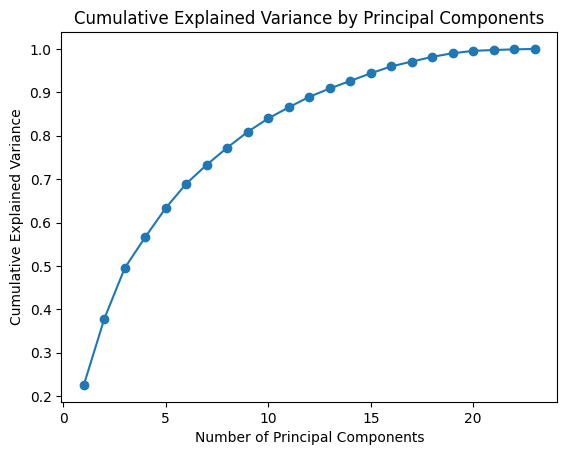

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# Apply PCA
pca = PCA()
X_pca =pca.fit_transform(X_train)
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()



**<p style="color:#f15bb5">1.Correlation Matrix Heatmap</p>**

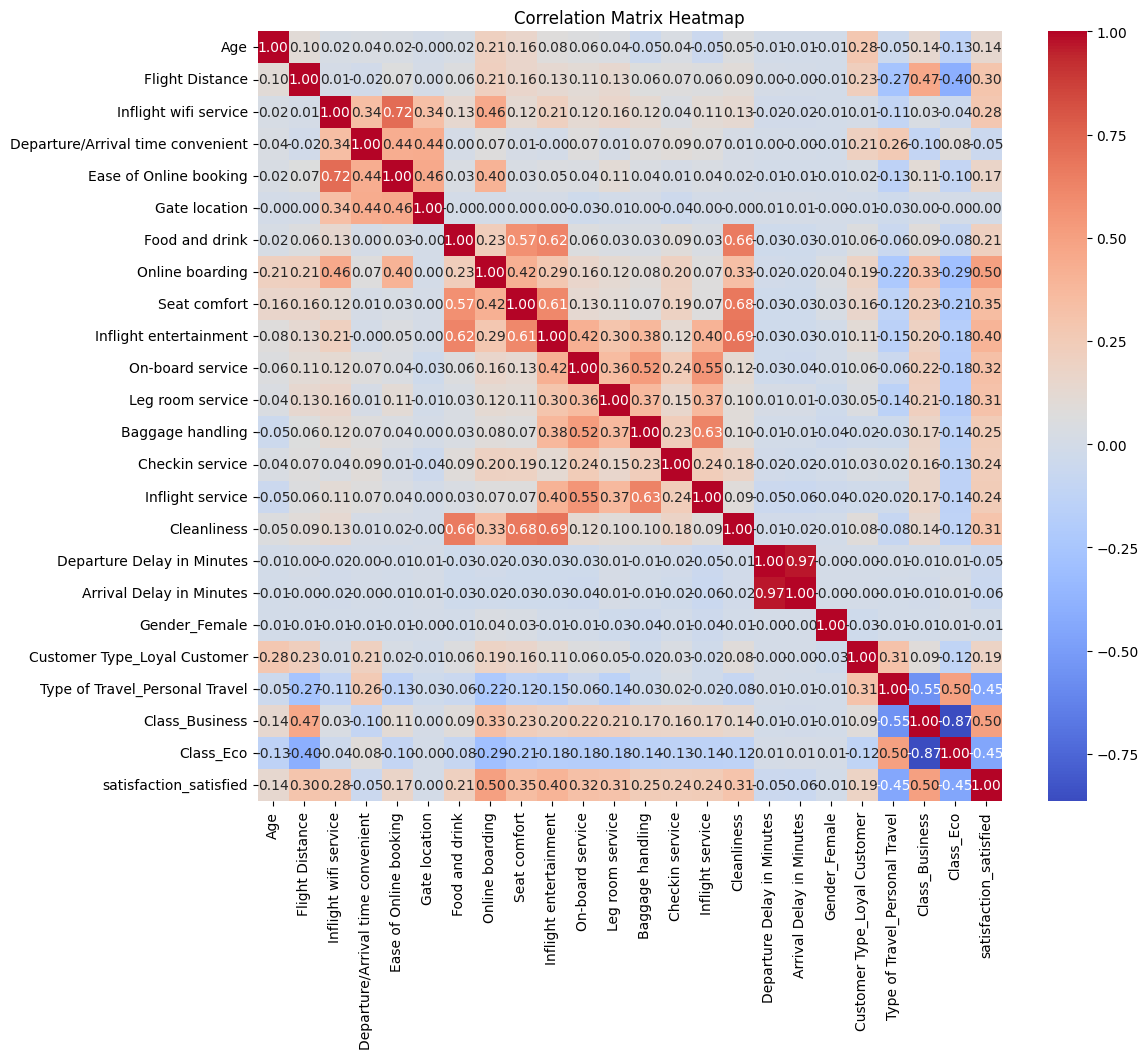

In [47]:

correlation_matrix = df_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


**<p style="color:#f15bb5">2.Pair Plot of Selected Features</p>**

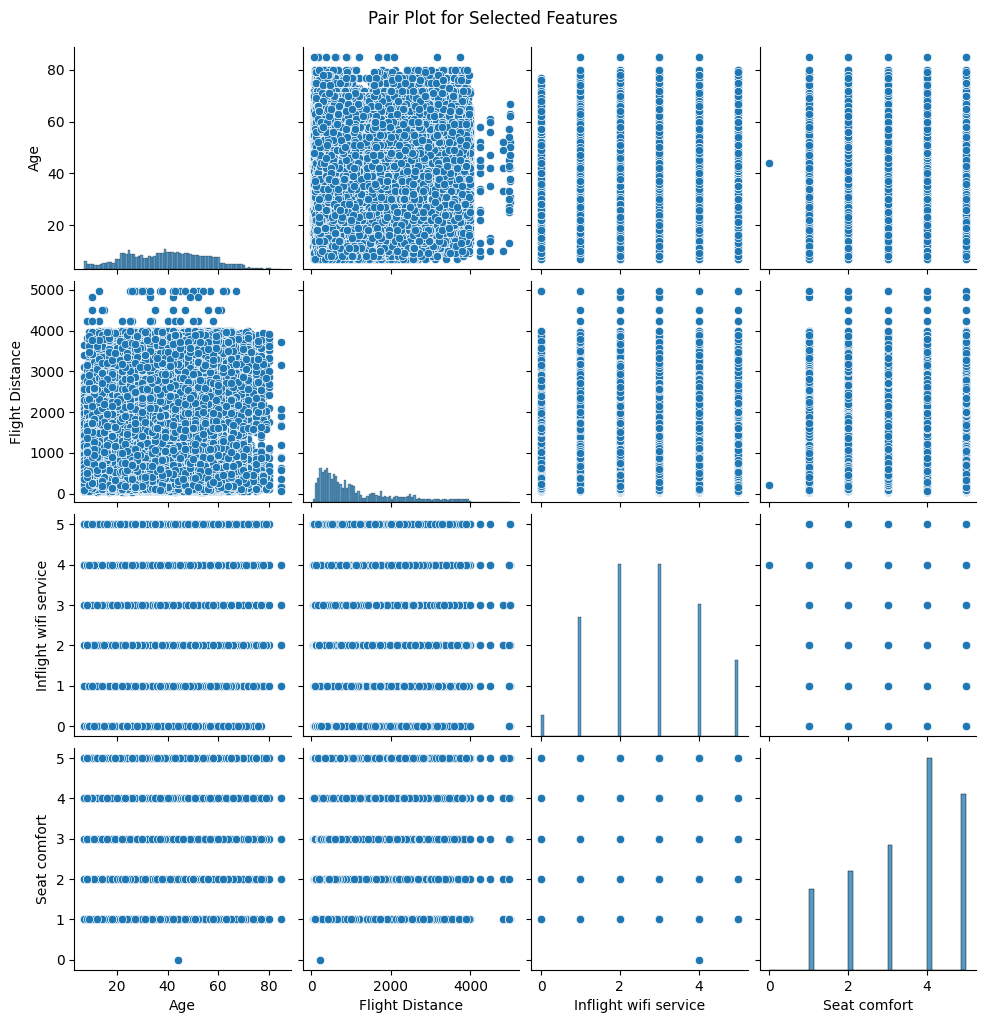

In [48]:
selected_features = ['Age', 'Flight Distance', 'Inflight wifi service', 'Seat comfort']
sns.pairplot(df_train[selected_features])
plt.suptitle('Pair Plot for Selected Features', y=1.02)
plt.show()


In [49]:
#Conversion of Data to numpy array
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

## *<span style="color:cyan">Machine Learning Models</span>*
### **<span style="color:#ffd166">1.Decision Tree</span>**
A decision tree is a fundamental machine learning model used for both classification and regression tasks. It represents a flowchart-like structure where each internal node denotes a decision based on a particular feature, each branch represents an outcome of that decision, and each leaf node represents the final prediction or classification. The tree is constructed recursively by partitioning the data at each node based on the most informative feature, usually determined by metrics like Gini impurity or information gain. Decision trees are interpretable and easy to visualize, making them valuable for understanding the decision-making process of a model. However, they are prone to overfitting, capturing noise in the data. Techniques like pruning and limiting the tree depth help mitigate this issue. Decision trees serve as the building blocks for more complex ensemble methods, such as random forests.

In [50]:
#import decisiontree classifier 
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier()

In [51]:
#provide trining  with fit() method 
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
predictions=model.predict(X_test)
predictions

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [53]:
print('         Decision Tree\n')
# Generate and print the classification report
class_report = classification_report(y_test, predictions)
print('Classification Report:')
print(class_report)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'\n\nAccuracy: {accuracy * 100:.2f}%')


         Decision Tree

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14573
           1       0.94      0.94      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

Confusion Matrix:
[[13892   681]
 [  687 10716]]


Accuracy: 94.73%


### **<span style="color:#ffd166">2.Deep Neural Network</span>**

A Deep Neural Network (DNN) is a type of artificial neural network characterized by multiple hidden layers between the input and output layers. These hidden layers enable the model to learn intricate patterns and representations from the input data. Each layer consists of neurons or nodes that perform weighted computations on the input and pass the results through activation functions, typically ReLU (Rectified Linear Unit) or sigmoid, to introduce non-linearities. DNNs are adept at automatically discovering complex hierarchical features in data, making them powerful for various tasks like image and speech recognition, natural language processing, and recommendation systems. Training DNNs often requires substantial amounts of data and computational resources but can yield impressive performance once properly trained, capturing intricate relationships within the data. Regularization techniques and careful tuning of hyperparameters are crucial for preventing overfitting and optimizing their performance.

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [55]:
intialiser=tf.keras.initializers.random_normal(seed=1)

DNNmodel=tf.keras.models.Sequential([
    Dense(units=512, activation="relu",kernel_initializer=intialiser),
    Dense(units=512, activation="relu",kernel_initializer=intialiser),
    Dense(units=256,activation="relu",kernel_initializer=intialiser),
    Dense(units=128,activation="relu",kernel_initializer=intialiser),
    Dense(units=64,activation="relu",kernel_initializer=intialiser),
    Dense(units=1,activation="sigmoid",kernel_initializer=intialiser)
])

In [56]:
DNNmodel.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01,clipvalue=1,clipnorm=1),  # Optimizer
    loss=tf.keras.losses.BinaryCrossentropy(),  # Loss function
    metrics=['accuracy']
)

In [57]:
#call back function for saving and storing models
class myCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.prev_loss = 0

    def on_epoch_end(self, epoch, logs={}):
        DNNmodel.save(f"C:/Users/Dhruv/OneDrive/Desktop/Coding/Saved Models/model_{epoch}.h5")
        if epoch > 0 and logs.get('loss') > self.prev_loss:
            print('\nLearning rate updated')
            self.model.optimizer.lr.assign(self.model.optimizer.lr.read_value() * 0.1)
        self.prev_loss = logs.get('loss')

callbacks = myCallback()


In [ ]:
DNNmodel.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test),callbacks=[callbacks])

In [59]:
savedmodel = tf.keras.models.load_model(r"C:\Users\Dhruv\OneDrive\Desktop\Coding\Saved Models\model_29.h5")


**(Kind Note: I have used saved model for metrics since training the model takes 30 minutes on my device)**

In [61]:
predictions = savedmodel.predict(X_test)

# Convert probabilities to binary predictions
predicted_labels = (predictions > 0.5).astype(int)

# Evaluate the model
DNNaccuracy = tf.keras.metrics.Accuracy()(y_test, predicted_labels)
precision = tf.keras.metrics.Precision()(y_test, predicted_labels)
recall = tf.keras.metrics.Recall()(y_test, predicted_labels)
print('         DNN Model\n')
# You can also use sklearn's classification_report and confusion_matrix
print("\nClassification Report:\n", classification_report(y_test, predicted_labels))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predicted_labels))
print("\nPrecision:", precision.numpy())
print("Recall:", recall.numpy())
print(f'\n\nAccuracy: {DNNaccuracy * 100:.2f}%')

812/812 [==============================] - 3s 3ms/step
         DNN Model


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.96      0.93      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976


Confusion Matrix:
 [[14078   495]
 [  804 10599]]

Precision: 0.9553813
Recall: 0.92949224


Accuracy: 95.00%


### **<span style="color:#ffd166">3.Random Forest</span>**
A random forest is an ensemble learning method used for both classification and regression tasks in machine learning. It operates by constructing a multitude of decision trees during training and outputs the mode of the classes for classification or the average prediction for regression. The "random" aspect comes from the introduction of randomness in two key ways: by training each tree on a random subset of the data (bootstrap sampling) and by considering only a random subset of features at each split in the decision tree. This randomness helps to decorrelate the individual trees, reducing overfitting and enhancing the model's generalization performance. Random forests are known for their robustness, versatility, and ability to handle large datasets with high dimensionality, making them a popular choice in various machine learning applications.

In [62]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()

In [63]:
model1.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
predictions1=model1.predict(X_test)
predictions1

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [65]:
print('         Random Forest\n')
# Generate and print the classification report
class_report1 = classification_report(y_test, predictions1)
print('Classification Report:')
print(class_report1)

# Generate and print the confusion matrix
conf_matrix1 = confusion_matrix(y_test, predictions1)
print('Confusion Matrix:')
print(conf_matrix1)

# Calculate accuracy
accuracy1 = accuracy_score(y_test, predictions1)
print(f'\n\nAccuracy: {accuracy1 * 100:.2f}%')

         Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Confusion Matrix:
[[14278   295]
 [  671 10732]]


Accuracy: 96.28%


### **<span style="color:#ffd166">4.XGBoost Classifier</span>**

XGBoost, short for eXtreme Gradient Boosting, is a powerful and efficient machine learning algorithm that belongs to the gradient boosting family. It excels in both classification and regression tasks and has gained widespread popularity for its high predictive accuracy. XGBoost builds an ensemble of weak learners, typically decision trees, sequentially, where each new tree corrects the errors of the previous ones. It uses a gradient descent optimization technique to minimize a specific loss function, incorporating both a regularization term and a learning rate to enhance generalization performance. XGBoost's key features include handling missing data, automatic handling of categorical features, and the ability to model complex relationships in the data. It also supports parallel and distributed computing, making it scalable for large datasets. XGBoost is known for its speed, accuracy, and robustness, and it has become a popular choice in various machine learning competitions and real-world applications

In [66]:
import xgboost as xgb
model2 = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification problems
    eval_metric='logloss'  # Logarithmic loss for binary classification
)

In [67]:
model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [68]:
predictions2 = model2.predict(X_test)
predictions2

array([1, 1, 0, ..., 0, 1, 0])

In [69]:
# Generate and print the classification report
print('         XGBoost Classifier\n')
class_report2 = classification_report(y_test, predictions2)
print('Classification Report:')
print(class_report2)

# Generate and print the confusion matrix
conf_matrix2 = confusion_matrix(y_test, predictions2)
print('Confusion Matrix:')
print(conf_matrix2)

# Calculate accuracy
accuracy2 = accuracy_score(y_test, predictions2)
print(f'\n\nAccuracy: {accuracy2 * 100:.2f}%')


         XGBoost Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Confusion Matrix:
[[14253   320]
 [  628 10775]]


Accuracy: 96.35%


## **<span style="color:#06d6a0">Final Outcome</span>**
#### Decision Tree Accuracy: 94.76%
#### DNN Model Accuracy: 95.00% (approx.)
#### Random Forest Accuracy: 96.26% (approx.)
#### XGBoost Accuracy: 96.35% 